# Plots of COVID-19 Cases and Deaths by Features

In [33]:
%matplotlib inline

In [34]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# read in the data frames

filepath = "Resources/analysis_importances.csv"
importances_df = pd.read_csv(filepath, index_col = False )

importances_df

,index,notebook,run_dt,Feature,Importance_cases,Importance_death
0,220,6,2021-11-10 22:48:38,new_death,0.669824,0.669824
1,221,6,2021-11-10 22:48:38,Year_submitted,0.317250,0.317250
2,222,6,2021-11-10 22:48:38,state_NE,0.001492,0.001492
3,223,6,2021-11-10 22:48:38,state_NV,0.000418,0.000418
4,224,6,2021-11-10 22:48:38,state_OK,0.000409,0.000409
...,...,...,...,...,...,...
195,107,18,2021-11-11 21:33:08,location_MD,0.000831,0.000911
196,108,18,2021-11-11 21:33:08,location_NV,0.000751,0.000808
197,109,18,2021-11-11 21:33:08,location_NY,0.000462,0.000696
198,110,18,2021-11-11 21:33:08,location_WA,0.000294,0.000656


In [36]:
importances_df.drop(columns=["index", "run_dt"], inplace=True)
importances_df

,notebook,Feature,Importance_cases,Importance_death
0,6,new_death,0.669824,0.669824
1,6,Year_submitted,0.317250,0.317250
2,6,state_NE,0.001492,0.001492
3,6,state_NV,0.000418,0.000418
4,6,state_OK,0.000409,0.000409
...,...,...,...,...
195,18,location_MD,0.000831,0.000911
196,18,location_NV,0.000751,0.000808
197,18,location_NY,0.000462,0.000696
198,18,location_WA,0.000294,0.000656


In [37]:
# create dataframe for holding the year 2020 related importances

first_df = importances_df.loc[(importances_df["notebook"]==6) | (importances_df["notebook"]==16) ]
first_df

,notebook,Feature,Importance_cases,Importance_death
0,6,new_death,0.669824,0.669824
1,6,Year_submitted,0.317250,0.317250
2,6,state_NE,0.001492,0.001492
3,6,state_NV,0.000418,0.000418
4,6,state_OK,0.000409,0.000409
...,...,...,...,...
83,16,state_FSM,0.000122,0.000187
84,16,state_LA,0.000120,0.000187
85,16,state_MA,0.000115,0.000179
86,16,state_WI,0.000114,0.000151


In [38]:
# separate dataframes for cases and for death




# learned against mean value from 2020 data (notebook 6)

#cases dataframes

first_database_cases_2020 = first_df.copy()

first_database_cases_2020 = first_database_cases_2020.loc[first_df["notebook"] == 6]
first_database_cases_2020.drop(columns = ["Importance_death"], inplace = True)

#death dataframes

first_database_death_2020 = first_df.copy()

first_database_death_2020 = first_database_death_2020.loc[first_df["notebook"] == 6]
first_database_death_2020.drop(columns = ["Importance_cases"], inplace = True)



# learned against mean value from 2020 and 2021 data (noteboo 16)

#cases dataframes

first_database_cases_2020_2021 = first_df.copy()

first_database_cases_2020_2021 = first_database_cases_2020_2021.loc[first_df["notebook"] == 16]
first_database_cases_2020_2021.drop(columns = ["Importance_death"], inplace = True)

#death dataframes

first_database_death_2020_2021 = first_df.copy()

first_database_death_2020_2021 = first_database_death_2020_2021.loc[first_df["notebook"] == 16]
first_database_death_2020_2021.drop(columns = ["Importance_cases"], inplace = True)


# graph lists

x_features = [x for x in first_database_cases_2020["Feature"] ]

cases_1_ds = first_database_cases_2020["Importance_cases"].squeeze()
cases_2_ds = first_database_cases_2020_2021["Importance_cases"].squeeze()


death_1_ds = first_database_death_2020["Importance_death"].squeeze()
death_2_ds = first_database_death_2020_2021["Importance_death"].squeeze()


graph_cases_list = [cases_1_ds, cases_2_ds]

graph_death_list = [death_1_ds, death_2_ds]

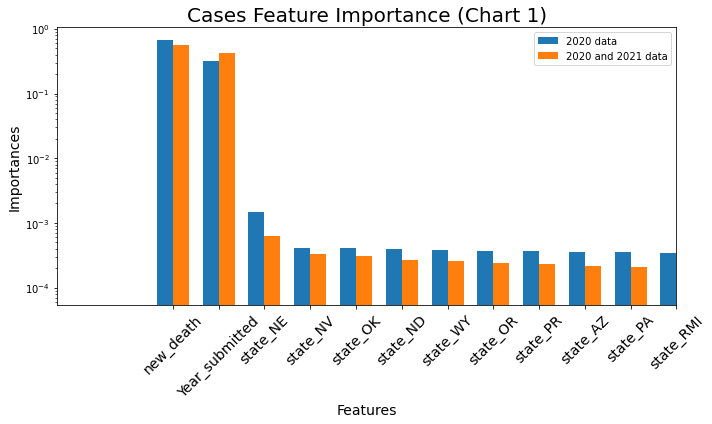

In [39]:
# bar plot for cases over differnt years used in machine learning

cases_1 = cases_1_ds.to_list()
cases_2 = cases_2_ds.to_list()

x = np.arange(len(x_features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

plot_1 = ax.bar(x - width/2, cases_1, width, label='2020 data', log = True)
plot_2 = ax.bar(x + width/2, cases_2, width, label='2020 and 2021 data', log = True)


ax.set_title("Cases Feature Importance (Chart 1)", fontsize = 20)
ax.set_ylabel("Importances", fontsize = 14)
ax.set_xlabel("Features", labelpad = None, fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(x_features, rotation = 45, fontsize = 14)
ax.set_xlim(right = 11)
ax.legend()

fig.tight_layout()
plt.savefig("Resources/Fig2.png")

plt.show()




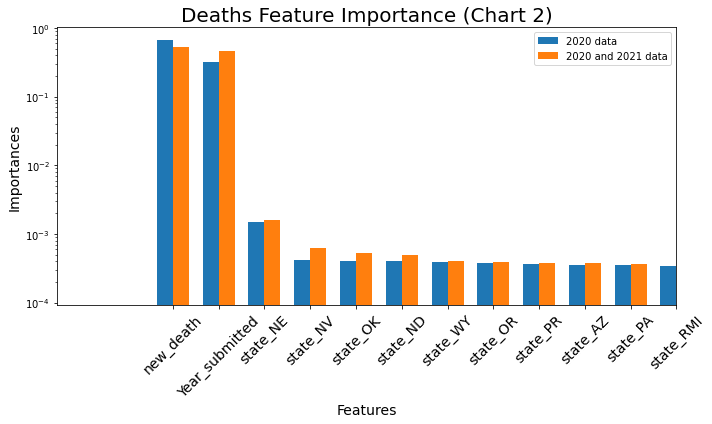

In [18]:
# bar plot for cases over differnt years used in machine learning

death_1 = death_1_ds.to_list()
death_2 = death_2_ds.to_list()

x = np.arange(len(x_features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

plot_1 = ax.bar(x - width/2, death_1, width, label='2020 data', log = True)
plot_2 = ax.bar(x + width/2, death_2, width, label='2020 and 2021 data', log = True)

ax.set_title("Deaths Feature Importance (Chart 2)", fontsize = 20)
ax.set_ylabel("Importances", fontsize = 14)
ax.set_xlabel("Features", labelpad = None, fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(x_features, rotation = 45, fontsize = 14)
ax.set_xlim(right = 11)
ax.legend()

fig.tight_layout()

plt.savefig("Resources/Fig3.png")

plt.show()


In [40]:
# create dataframe for holding the years 2020 and 2021 related importances

second_df = importances_df.loc[(importances_df["notebook"]==17) | (importances_df["notebook"]==18) ]
second_df

,notebook,Feature,Importance_cases,Importance_death
88,17,distributed,0.210087,0.334163
89,17,location_HI,0.117701,0.202469
90,17,administered,0.113031,0.070584
91,17,location_VI,0.100224,0.033733
92,17,location_DC,0.095416,0.028672
...,...,...,...,...
195,18,location_MD,0.000831,0.000911
196,18,location_NV,0.000751,0.000808
197,18,location_NY,0.000462,0.000696
198,18,location_WA,0.000294,0.000656


In [64]:
# separate dataframes for cases and for death


# learned against mean value from 2020 data (notebook 17)

#cases dataframes

second_database_cases_2020 = second_df.copy()

second_database_cases_2020 = second_database_cases_2020.loc[second_df["notebook"] == 17]
second_database_cases_2020.drop(columns = ["Importance_death"], inplace = True)

#death dataframes

second_database_death_2020 = second_df.copy()

second_database_death_2020 = second_database_death_2020.loc[second_df["notebook"] == 17]
second_database_death_2020.drop(columns = ["Importance_cases"], inplace = True)


# learned against mean value from 2020 and 2021 data (notebook 18)

#cases dataframes

second_database_cases_2020_2021 = second_df.copy()

second_database_cases_2020_2021 = second_database_cases_2020_2021.loc[second_df["notebook"] == 18]
second_database_cases_2020_2021.drop(columns = ["Importance_death"], inplace = True)

# death dataframes

second_database_death_2020_2021 = second_df.copy()

second_database_death_2020_2021 = second_database_death_2020_2021.loc[second_df["notebook"] == 18]
second_database_death_2020_2021.drop(columns = ["Importance_cases"], inplace = True)



# graph lists

x_features = [x for x in second_database_cases_2020["Feature"] ]

cases_3_ds = second_database_cases_2020["Importance_cases"].squeeze()
cases_4_ds = second_database_cases_2020_2021["Importance_cases"].squeeze()


death_3_ds = second_database_death_2020["Importance_death"].squeeze()
death_4_ds = second_database_death_2020_2021["Importance_death"].squeeze()


graph_cases_list = [cases_3_ds, cases_4_ds]

graph_death_list = [death_3_ds, death_4_ds]

In [65]:
print(f"length cases 3 = {len(cases_3_ds)}")
print(f"length cases 4 = {len(cases_4_ds)}")
print(f"length death 3 = {len(death_3_ds)}")
print(f"length death 4 = {len(death_4_ds)}")
print(f"length x_feature_new is {len(x_features_new)}")

length cases 3 = 56
length cases 4 = 56
length death 3 = 56
length death 4 = 56
length x_feature_new is 56


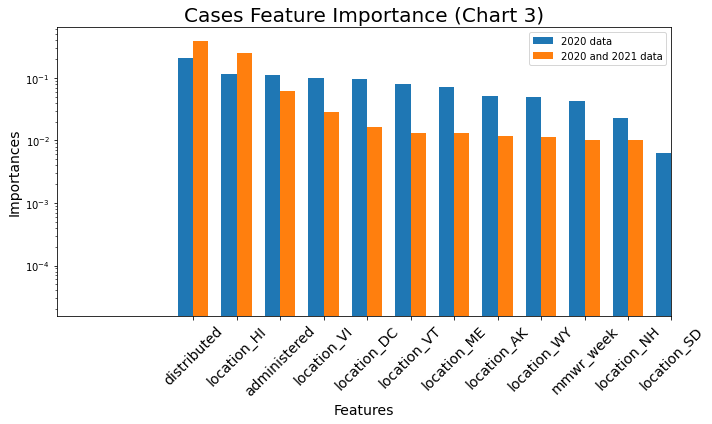

In [66]:

cases_3 = cases_3_ds.to_list()
cases_4 = cases_4_ds.to_list()

x = np.arange(len(x_features))
width = 0.35

 
fig, ax = plt.subplots(figsize=(10, 6))

plot_1 = ax.bar(x - width/2, cases_3, width, label='2020 data', log = True)
plot_2 = ax.bar(x + width/2, cases_4, width, label='2020 and 2021 data', log = True)


ax.set_title("Cases Feature Importance (Chart 3)", fontsize = 20)
ax.set_ylabel("Importances", fontsize = 14)
ax.set_xlabel("Features", labelpad = None, fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(x_features, rotation = 45, fontsize = 14)
ax.set_xlim(right = 11)
ax.legend()

fig.tight_layout()
plt.savefig("Resources/Fig4.png")

plt.show()


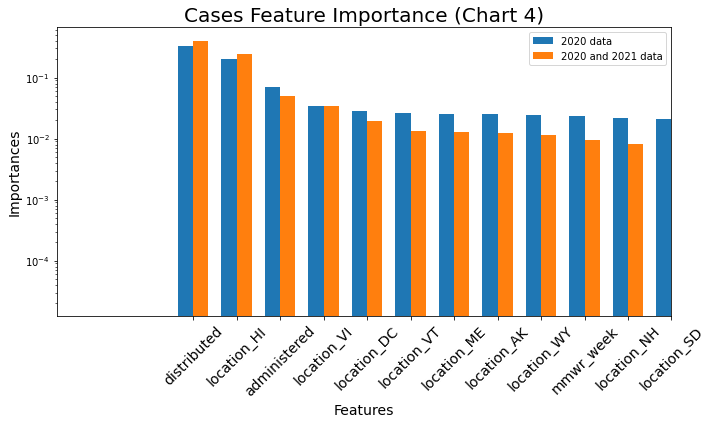

In [67]:
x_features = [x for x in second_database_cases_2020["Feature"] ]

death_3 = death_3_ds.to_list()
death_4 = death_4_ds.to_list()

x = np.arange(len(x_features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

plot_1 = ax.bar(x - width/2, death_3, width, label='2020 data', log = True)
plot_2 = ax.bar(x + width/2, death_4, width, label='2020 and 2021 data', log = True)


ax.set_title("Cases Feature Importance (Chart 4)", fontsize = 20)
ax.set_ylabel("Importances", fontsize = 14)
ax.set_xlabel("Features", labelpad = None, fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(x_features, rotation = 45, fontsize = 14)
ax.set_xlim(right = 11)
ax.legend()

fig.tight_layout()
plt.savefig("Resources/Fig5.png")

plt.show()